###  Solar Electric Programs Reported In the State of New York - Data Project

 The dataset includes a comprehensive record of distributed solar energy projects completed and in the pipeline in New York State, because of the New York State’s Incentive Program/ NYSERDA Incentive Program (for decentralized solar energy projects). The projects recorded span from 2000 to 2017. The data includes project costs, size, type of PV modules, incentives, and program types, as well as several other variables, such as green jobs created, that enable gaining insights into how to advance with the green energy transition at the community/citizens’ levels.

## Contents

##### This script includes a set of data cleaning steps for preparing the dataset

#### 1. Importing Data

#### 2. Checking Data Types

#### 3. Drop Columns

#### 4. Check for Missing Values

#### 5.Check for Duplicates

#### 6. Descriptive Statistics

#### 7. Checking Distribution

#### 8. Exporting data to a pickle file

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 1. Importing Data

In [2]:
#creating a path
path= r'C:\Users\ii\OneDrive\02052023Solar Programs NY'

In [3]:
path

'C:\\Users\\isobr\\OneDrive\\02052023Solar Programs NY'

In [4]:
#importing the excel dataset
df_solar = pd.read_excel(os.path.join(path, '02. Prepared data', 'solar_power_NY.xlsx'), index_col = False)

In [5]:
df_solar.head()

,index,project_number,city,county,state,zip_code,sector,program_type,solicitation,electric_utility,...,incentive,total_nameplate_kw_dc,expected_kwh_annual_production,remote_net_metering,affordable_solar,community_distributed_generation,green_jobs_participant,location_data,"Latitude, longitude",Latitude
0,0,5137-49041,Maine,Broome,NY,13802,Residential,Residential/Small Commercial,PON 2112,NYS Electric and Gas,...,6930.0,10.00,11738.0,No,No,No,NaN,"Maine, NY 13802\n(42.240938, -76.047937)","42.240938, -76.047937)",42.240938
1,1,5137-46019,Levittown,Nassau,NY,11756,Residential,Residential/Small Commercial,PON 2112LI,PSEG Long Island,...,2520.0,7.00,8217.0,No,No,No,NaN,"Levittown, NY 11756\n(40.725845, -73.517198)","40.725845, -73.517198)",40.725845
2,2,5137-52151,Cortland,Cortland,NY,13045,Residential,Residential/Small Commercial,PON 2112,National Grid,...,11025.0,12.25,14380.0,No,No,No,NaN,"Cortland, NY 13045\n(42.588691, -76.185061)","42.588691, -76.185061)",42.588691
3,3,5129-94109,Staten Island,Richmond,NY,10314,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,...,2943.0,4.91,5758.0,No,No,No,NaN,"Staten Island, NY 10314\n(40.604049, -74.152798)","40.604049, -74.152798)",40.604049
4,4,5137-46454,Warwick,Orange,NY,10990,Residential,Residential/Small Commercial,PON 2112,Orange and Rockland Utilities,...,5720.0,5.72,6714.0,No,No,No,NaN,"Warwick, NY 10990\n(41.263165, -74.365461)","41.263165, -74.365461)",41.263165


In [6]:
df_solar.shape

(84721, 32)

The dataset has 30 columns and 84721 observations

### 2. Checking Data Types

In [7]:
df_solar.dtypes

index                                 int64
project_number                       object
city                                 object
county                               object
state                                object
zip_code                              int64
sector                               object
program_type                         object
solicitation                         object
electric_utility                     object
purchase_type                        object
date_application_received            object
date_completed                       object
project_status                       object
contractor                           object
Primary Inverter Manufacturer        object
primary_inverter_model_number        object
total_inverter_quantity             float64
primary_pv_module_manufacturer       object
pv_module_model_number               object
total_pv_ module_quantity           float64
project_cost                        float64
incentive                       

Some variables need to have a different data type, for instance dates are not yet read as dates, the same for some of the last variables which should be bolean types. 

In [8]:
#Convert the data_application_received to date data type
df_solar['date_application_received']= pd.to_datetime(df_solar['date_application_received'])

In [9]:
#Convert the date_completed to date data type
df_solar['date_completed']= pd.to_datetime(df_solar['date_completed'])

In [10]:
#Convert affordable_solar to bolean
df_solar['affordable_solar'] = df_solar['affordable_solar'].replace({'Yes': True, 'No': False})

In [11]:
#Convert community_distributed_generation to bolean
df_solar['community_distributed_generation'] = df_solar['community_distributed_generation'].replace({'Yes': True, 'No': False})

In [12]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84721 entries, 0 to 84720
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             84721 non-null  int64         
 1   project_number                    84721 non-null  object        
 2   city                              84721 non-null  object        
 3   county                            84721 non-null  object        
 4   state                             84721 non-null  object        
 5   zip_code                          84721 non-null  int64         
 6   sector                            84721 non-null  object        
 7   program_type                      84721 non-null  object        
 8   solicitation                      84721 non-null  object        
 9   electric_utility                  84721 non-null  object        
 10  purchase_type                     79613 non-nu

In [13]:
#checking for variables with mixed data types
for col in df_solar.columns.tolist():
  weird = (df_solar[[col]].applymap(type) != df_solar[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_solar[weird]) > 0:
    print (col)

purchase_type
date_completed
contractor
Primary Inverter Manufacturer
primary_inverter_model_number
primary_pv_module_manufacturer
pv_module_model_number
remote_net_metering
green_jobs_participant


These columns have all mixed data types, and need to be checked. Some of the these columns however are not relevant for the analysis and will be dropped.  

### 3. Drop columns

In [14]:
df_solar.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'solicitation', 'electric_utility',
       'purchase_type', 'date_application_received', 'date_completed',
       'project_status', 'contractor', 'Primary Inverter Manufacturer',
       'primary_inverter_model_number', 'total_inverter_quantity',
       'primary_pv_module_manufacturer', 'pv_module_model_number',
       'total_pv_ module_quantity', 'project_cost', 'incentive',
       'total_nameplate_kw_dc', 'expected_kwh_annual_production',
       'remote_net_metering', 'affordable_solar',
       'community_distributed_generation', 'green_jobs_participant',
       'location_data', 'Latitude, longitude', 'Latitude'],
      dtype='object')

In [15]:
#some variables are not useful for the analysis so they can be dropped 
df_solar = df_solar.drop(columns = ['solicitation', 'contractor','Primary Inverter Manufacturer',
       'primary_inverter_model_number', 'primary_pv_module_manufacturer','pv_module_model_number'])

In [16]:
df_solar.shape

(84721, 26)

In [17]:
# checking the columns
df_solar.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'date_completed', 'project_status',
       'total_inverter_quantity', 'total_pv_ module_quantity', 'project_cost',
       'incentive', 'total_nameplate_kw_dc', 'expected_kwh_annual_production',
       'remote_net_metering', 'affordable_solar',
       'community_distributed_generation', 'green_jobs_participant',
       'location_data', 'Latitude, longitude', 'Latitude'],
      dtype='object')

In [18]:
#checking for variables with mixed data types
for col in df_solar.columns.tolist():
  weird = (df_solar[[col]].applymap(type) != df_solar[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_solar[weird]) > 0:
    print (col)

purchase_type
date_completed
remote_net_metering
green_jobs_participant


We still have four columns with mixed data types, likely some have null values that need to be handled, so next step is checking for missing values.

### 4. Check for Missing Values

In [19]:
df_solar.isnull().sum()

index                                   0
project_number                          0
city                                    0
county                                  0
state                                   0
zip_code                                0
sector                                  0
program_type                            0
electric_utility                        0
purchase_type                        5108
date_application_received               0
date_completed                       4692
project_status                          0
total_inverter_quantity              4060
total_pv_ module_quantity            4038
project_cost                          187
incentive                              14
total_nameplate_kw_dc                   0
expected_kwh_annual_production          0
remote_net_metering                 39515
affordable_solar                        0
community_distributed_generation        0
green_jobs_participant              77423
location_data                     

Missing values for purchase type, which is a nominal variable cannot be imputed, we just leave it as it is. For "date_completed" for now we can also leave the values missing and/or delete this column too, since it will not be used in the analysis. For total PV module quantity, the missing value could be inputted through the regression value with the project cost, because these two variables are likely to be correlated. Also, the missing values for project cost may be inputed by adding the predictive value of a regression (with e.g., total_nameplate_kw_dc, which is likely correlated to the project cost) plus a random residual value (i.e., stochastic regression imputation). For incentives, the missing values make up 0.01% of the data, so I could input the mean value, or a 'hot deck imputation' (https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/). For now, I will not input any of the missing values.

### 5.Check for Duplicates

In [20]:
#Checking for duplicates
df_solar_dup = df_solar [df_solar.duplicated()]

In [21]:
df_solar_dup

,index,project_number,city,county,state,zip_code,sector,program_type,electric_utility,purchase_type,...,incentive,total_nameplate_kw_dc,expected_kwh_annual_production,remote_net_metering,affordable_solar,community_distributed_generation,green_jobs_participant,location_data,"Latitude, longitude",Latitude


There are no duplicate values

### 6. Descriptive Statistics

In [22]:
df_solar.describe()

,index,zip_code,total_inverter_quantity,total_pv_ module_quantity,project_cost,incentive,total_nameplate_kw_dc,expected_kwh_annual_production
count,84721.000000,84721.000000,80661.000000,80683.000000,8.453400e+04,8.470700e+04,84721.000000,8.472100e+04
mean,42360.000000,11928.055110,8.467078,74.635723,7.349231e+04,1.398508e+04,24.660494,2.874277e+04
std,24456.990415,1091.919839,15.901317,551.596685,3.854108e+05,7.625908e+04,194.741712,2.270106e+05
min,0.000000,501.000000,1.000000,1.000000,1.500000e+02,0.000000e+00,0.140000,1.640000e+02
25%,21180.000000,11233.000000,1.000000,19.000000,2.295000e+04,2.070000e+03,5.100000,5.987000e+03
50%,42360.000000,11758.000000,1.000000,26.000000,3.240000e+04,3.780000e+03,7.140000,8.381000e+03
75%,63540.000000,12498.000000,12.000000,36.000000,4.579200e+04,8.160000e+03,9.920000,1.164400e+04
max,84720.000000,15787.000000,800.000000,14800.000000,2.267184e+07,3.290860e+06,5799.420000,6.807591e+06


In [23]:
df_solar.describe().to_clipboard

<bound method NDFrame.to_clipboard of               index      zip_code  total_inverter_quantity  \
count  84721.000000  84721.000000             80661.000000   
mean   42360.000000  11928.055110                 8.467078   
std    24456.990415   1091.919839                15.901317   
min        0.000000    501.000000                 1.000000   
25%    21180.000000  11233.000000                 1.000000   
50%    42360.000000  11758.000000                 1.000000   
75%    63540.000000  12498.000000                12.000000   
max    84720.000000  15787.000000               800.000000   

       total_pv_ module_quantity  project_cost     incentive  \
count               80683.000000  8.453400e+04  8.470700e+04   
mean                   74.635723  7.349231e+04  1.398508e+04   
std                   551.596685  3.854108e+05  7.625908e+04   
min                     1.000000  1.500000e+02  0.000000e+00   
25%                    19.000000  2.295000e+04  2.070000e+03   
50%                

In [24]:
df_solar['expected_kwh_annual_production'].mean()

28742.77206359698

In [25]:
program_frequency=df_solar.groupby('program_type').agg({'project_cost':['mean','median','min','max']})

In [26]:
program_frequency

project_cost                         \
                                             mean      median        min   
program_type                                                               
Commercial/Industrial (Competitive)  2.388359e+06  1485792.00  135004.63   
Commercial/Industrial (MW Block)     4.106738e+06  4471836.63  219124.28   
Residential/Small Commercial         4.522856e+04    32200.00     150.00   

                                                 
                                            max  
program_type                                     
Commercial/Industrial (Competitive)   9962128.0  
Commercial/Industrial (MW Block)     22671836.0  
Residential/Small Commercial          5193440.0

In [27]:
program_frequency.to_clipboard

<bound method NDFrame.to_clipboard of                                      project_cost                         \
                                             mean      median        min   
program_type                                                               
Commercial/Industrial (Competitive)  2.388359e+06  1485792.00  135004.63   
Commercial/Industrial (MW Block)     4.106738e+06  4471836.63  219124.28   
Residential/Small Commercial         4.522856e+04    32200.00     150.00   

                                                 
                                            max  
program_type                                     
Commercial/Industrial (Competitive)   9962128.0  
Commercial/Industrial (MW Block)     22671836.0  
Residential/Small Commercial          5193440.0  >

### 7. Checking Distribution

Text(0.5, 1.0, 'Expected Annual Production in KWh')

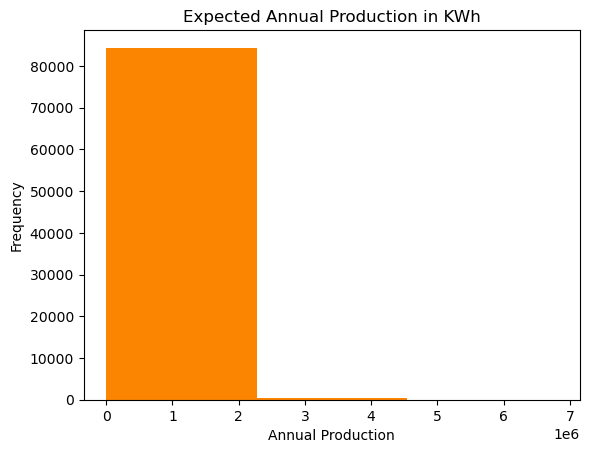

In [28]:
#Creating an histogram of expected_kwh_annual_production to check distribuition
hist_cost=df_solar['expected_kwh_annual_production'].plot.hist(color='#fb8500', bins = 3)
plt.xlabel('Annual Production', fontsize=10)
plt.title('Expected Annual Production in KWh')

<AxesSubplot:>

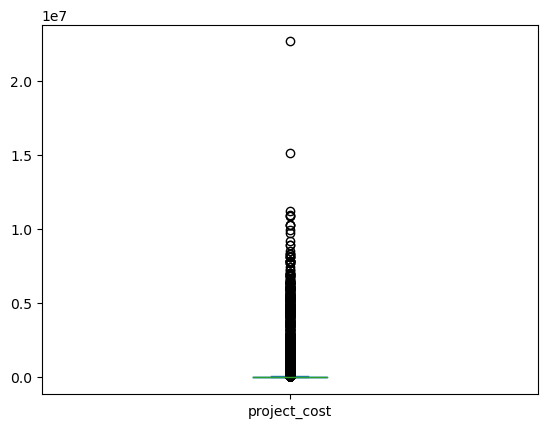

In [29]:
#creating a simple box plot to check distribuition and outliers for project cost
df_solar ['project_cost'].plot(kind='box')

Sources for boxplot in Python: https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4

[]

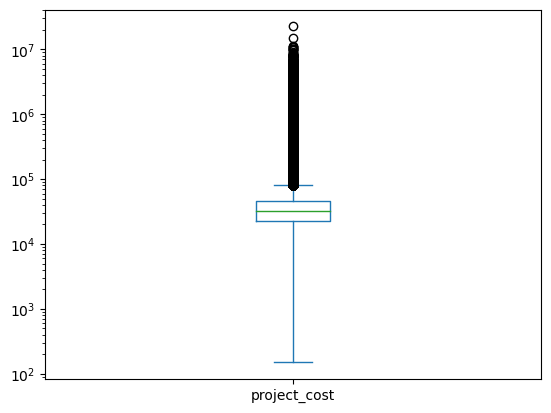

In [30]:
#adding the y-axis to a logarithmic scale by adding plt.semiology () method from matplotlib notation, the view of outliers becaumes clearer
df_solar['project_cost'].plot(kind='box')
plt.semilogy()

Exploratory visuals indicate the distribuition is right-skewed, because the wisker is shorter on the upper end of the box, although the median is in the middle of the box. There are many outliers on the higher end. This is also indicated in the histogram above.

<AxesSubplot:>

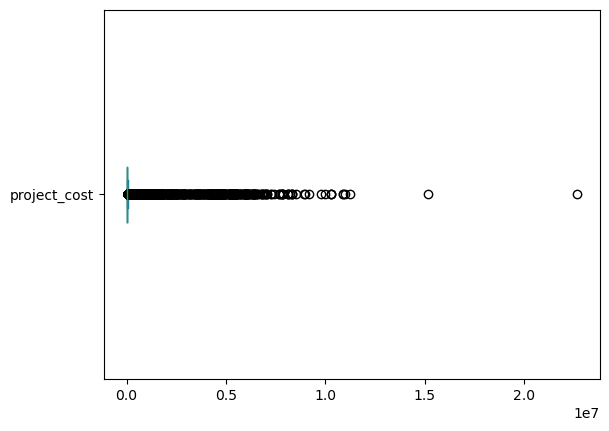

In [94]:
#making boxplots horizontal
df_solar['project_cost'].plot(kind='box', vert=False)

### 8. Exporting data to a pickle file

In [95]:
df_solar.to_pickle(os.path.join(path, '02. Prepared data', 'solar_power.pkl'))

In conclusion, data cleaning has resulted in the identification of variables with missing values, in a dataset that has a significant amount of outlier values which will need to be addressed. 